# PRTools for Python

In [1]:
%matplotlib inline

import numpy as np
import prtools as pr
import matplotlib.pyplot as plt

## 1.6 (a)

In [2]:
x = np.array(
    [
        [.7, .3, .2],
        [2., .1, 0.]
    ]
)
x

array([[0.7, 0.3, 0.2],
       [2. , 0.1, 0. ]])

In [3]:
np.mean(x), np.std(x)

(0.55, 0.6849574196011506)

In [4]:
np.mean(x, axis=0), np.mean(x, axis=1)

(array([1.35, 0.2 , 0.1 ]), array([0.4, 0.7]))

## 1.7(a)

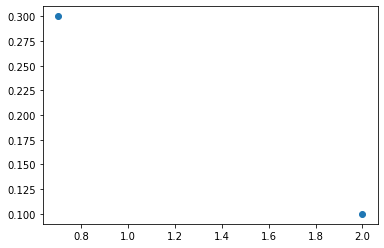

In [5]:
plt.scatter(x[:, 0], x[:, 1])

## 1.8(a)

In [6]:
lab = np.array([1, 2, 1]).T

In [7]:
x, x.shape, lab.shape

(array([[0.7, 0.3, 0.2],
        [2. , 0.1, 0. ]]),
 (2, 3),
 (3,))

In [8]:
a = pr.prdataset(x.T,lab)

In [9]:
print(a)

3 by 2 prdataset with 2 classes: [2 1]


## 1.9(a)

In [10]:
boomerangs = pr.boomerangs()

In [11]:
print(boomerangs)

Boomerangs 100 by 3 prdataset with 2 classes: [57 43]


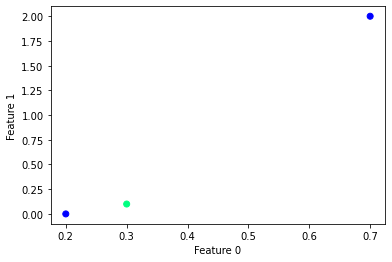

In [12]:
pr.scatterd(a)

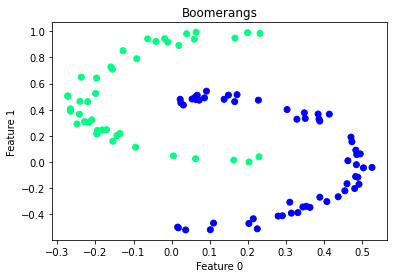

In [13]:
pr.scatterd(boomerangs)

### to remove labels

In [14]:
a = pr.gendatb()
b = pr.prdataset(+a)

print(b)

100 by 2 prdataset with 1 class: [100]


## 1.4 Creating mappings and decision boundaries

In [15]:
a = pr.gendatb()
w = pr.nmc(a)

print(w)

Nearest mean, 2 to 2 trained mapping


In [16]:
b = a * w
print(b)

Banana dataset 100 by 2 prdataset with 2 classes: [50 50]


In [17]:
lab = b*pr.labeld()
lab[:10]

array([[-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1]])

In [18]:
e = b * pr.testc()
e

0.21

In [19]:
w = pr.svc(a,('rbf',4.5,1))

### 1.10

In [20]:
a = pr.gendatb()

In [21]:
classifiers = ["ldc", "nmc", "qdc", "parzenc", 'knnc']
trained_classifiers = [getattr(pr, cls)(a) for cls in classifiers]

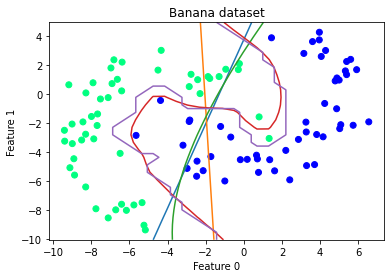

In [22]:
pr.scatterd(a)
[pr.plotc(tc) for tc in trained_classifiers];

/home/ojas/anaconda3/envs/ml/lib/python3.9/site-packages/prtools/mapping.py:513: UserWarning: No contour levels were found within the data range.
  CS = plt.contour(x,y,z,levels,colors=colors)


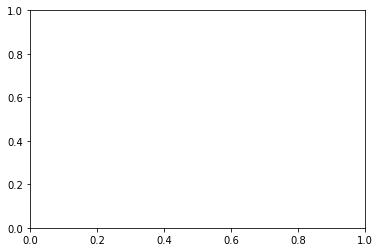

In [23]:
pr.plotc(w)

In [24]:
a * pr.testc()

0.61

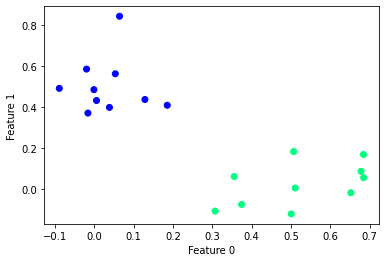

In [25]:
a = np.random.normal((0,0.5),(0.1,0.1), size=[10,2]).tolist()
b = np.random.normal((0.5,0),(0.1,0.1), size=[10,2]).tolist()
x = []
y = []
for a_ in a:
    x.append(a_)
    y.append(0)
for b_ in b:
    x.append(b_)
    y.append(1)

a = pr.prdataset(x, np.array(y))
pr.scatterd(a)

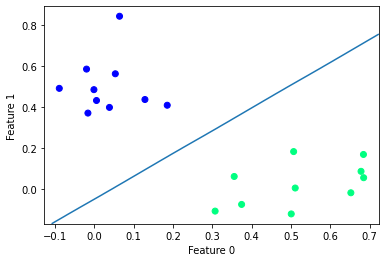

In [26]:
w = pr.ldc(a)
pr.scatterd(a)
pr.plotc(w)

## 1.13

In [27]:
xs = np.random.standard_normal((1000, 2))
xs_ds = pr.prdataset(xs)

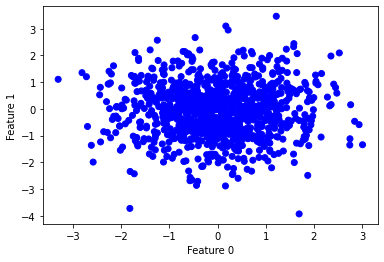

In [28]:
pr.scatterd(xs_ds)

In [29]:
w = pr.gaussm(xs_ds)

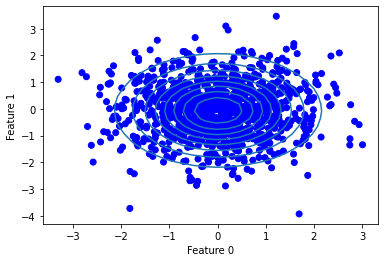

In [30]:
pr.scatterd(xs_ds)
pr.plotm(w)

### 1.15

In [31]:
cov = [[1, 0], [0, 100]]

a = np.random.multivariate_normal([.5, 0], cov, 500)
b = np.random.multivariate_normal([.8, .5], cov, 500)

a = np.hstack((a, np.zeros((a.shape[0], 1))))
b = np.hstack((b, np.ones((b.shape[0], 1))))

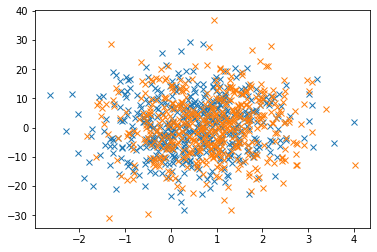

In [32]:
ax = plt.gca()
ax.plot(a[:, 0], a[:, 1], 'x')
ax.plot(b[:, 0], b[:, 1], 'x')

#### 1.15 a
The data should have a linear boundary

#### 1.15 b

It might not really depend on where the optimal boundary is due to the lack of training data. And for the same reason it depends more on the distribution of the small set of points for each class.

#### 1.15 c

In [33]:
data = np.vstack((a, b))

In [34]:
labels = data[:, -1]
labels[:5]

array([0., 0., 0., 0., 0.])

In [35]:
dataset = pr.prdataset(data[:, :-1], labels)

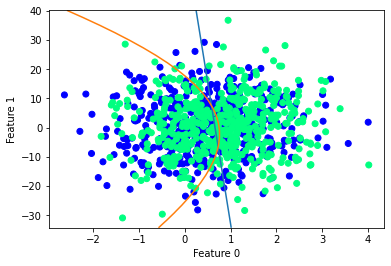

In [36]:
classifiers = ["ldc", "qdc"]
trained_classifiers = [getattr(pr, cls)(dataset) for cls in classifiers]
pr.scatterd(dataset)
[pr.plotc(tc) for tc in trained_classifiers];

The ldc boundary will of course be linear due to its nature. The qdc boundary however is a curve and is able to accomodate the data just a little bit better than its ldc counterpart.

#### 1.15 d
The solution that is given by ldc and qdc will be really close to each other (even in terms of their performance) as the number of points goes up.

### Exercise 1.16

#### 1.16 a

In [37]:
a = np.random.uniform(size=(2, 10))
b = np.random.standard_normal((2, 10))
a = np.vstack((a, np.zeros((1, a.shape[1]))))
b = np.vstack((b, np.ones((1, b.shape[1]))))

a = a.T
b = b.T

data = np.vstack((a, b))

labels = data[:, -1]

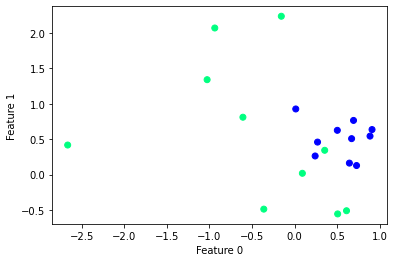

In [38]:
dataset = pr.prdataset(data[:, :-1], labels)
pr.scatterd(dataset)

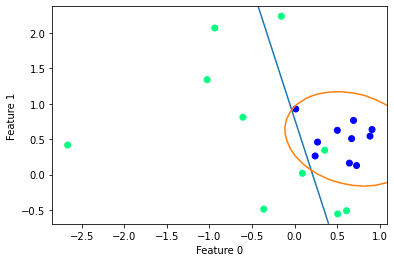

In [39]:
classifiers = ["ldc", "qdc"]
trained_classifiers = [getattr(pr, cls)(dataset) for cls in classifiers]
pr.scatterd(dataset)
[pr.plotc(tc) for tc in trained_classifiers];

with qdc: 2 points on the wrong side
with ldc: 8 on the wrong side

#### 1.16 b

In [40]:
ldc_preds = (dataset * trained_classifiers[0] * pr.labeld()).flatten()
qdc_preds = (dataset * trained_classifiers[1] * pr.labeld()).flatten()

##### Missclassifications given below

In [41]:
np.count_nonzero((labels == ldc_preds) == 0), np.count_nonzero((labels == qdc_preds) == 0)

(4, 1)

## Ex 1.6

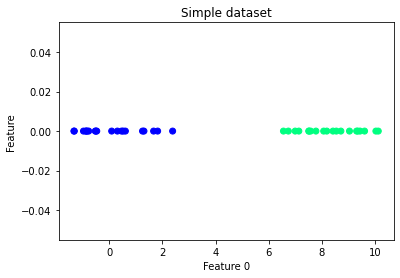

In [42]:
a = pr.gendats([20,20],1,8);
pr.scatterd(a)

The function parzenm estimates a density for a given dataset. In most cases a
PRTools
prdataset is labeled, and these labels are used in the function parzenm to
estimate a density for each class. To define a Parzen density estimator with a certain
width parameter h on the entire dataset, ignoring labels, type:

In [43]:
h = .5
a = pr.prdataset(+a)
w = pr.parzenm(a, h)

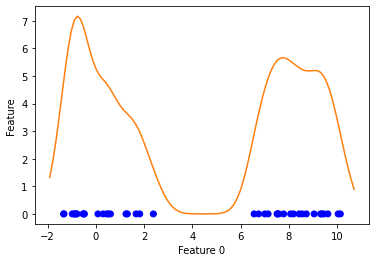

In [44]:
pr.scatterd(a); pr.plotm(w, gridsize=100)

In [45]:
h_s = [.3, .5, .8, 1., 2.]
# .3 -> orange
# .5 -> red 
# .8 -> brown
# 1 -> grey
# 2. -> blue
trained_parzens = [pr.parzenm(a, h) for h in h_s]

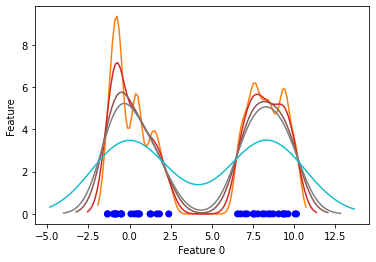

In [46]:
pr.scatterd(a)
[pr.plotm(w, gridsize=100) for w in trained_parzens];

h at any value below one (ie: .8, .5, .3) seems to be working good

#### 1.18

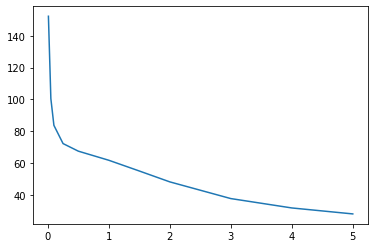

In [47]:
a = pr.gendats([20,20],1,8)
# Generate data
a = pr.prdataset(+a)
hs = [0.01,0.05,0.1,0.25,0.5,1,1.5,2,3,4,5] # Array of h’s to try
LL = np.zeros(len(hs))
for i in range(len(hs)):
# For each h...
    w = pr.parzenm(a,hs[i])
# estimate Parzen density
    LL[i] = np.sum(np.log(+(a*w)));
# calculate log-likelihood
plt.plot(hs,LL);

The highest log-likelihood seems to be acheived when h=0.05

#### 1.19

<ipython-input-48-bf7ec1a2c361>:12: RuntimeWarning: divide by zero encountered in log
  Ltst[i] = np.sum(np.log(+(tst*w)))


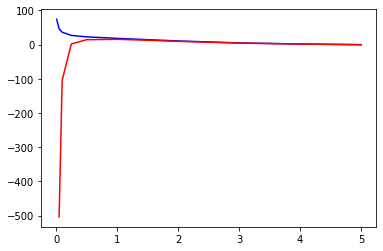

In [48]:
[trn, tst] = pr.gendat(a, 0.5)
# Split into trn and tst, both 50%
hs = [0.01,0.05,0.1,0.25,0.5,1,1.5,2,3,4,5]
Ltrn = np.zeros(len(hs))
Ltst = np.zeros(len(hs))
for i in range(len(hs)):
# For each h...
    w = pr.parzenm(trn,hs[i])
# estimate Parzen density
    Ltrn[i] = np.sum(np.log(+(trn*w)))
# calculate trn log-likelihood
    Ltst[i] = np.sum(np.log(+(tst*w)))
# calculate tst log-likelihood
plt.plot(hs,Ltrn, 'b-')
plt.plot(hs,Ltst,'r-')

In [49]:
np.argmax(Ltst)

5

## 1.20

In [50]:
dataset = pr.gendatb((20, 20))

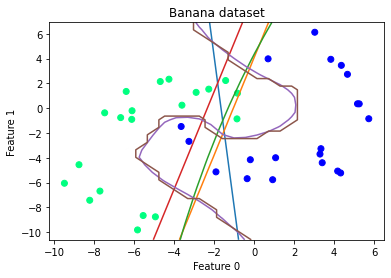

In [51]:
classifiers = ["nmc", "ldc", "qdc", "fisherc" ,"parzenc", "knnc"]
trained_classifiers = [getattr(pr, cls)(dataset, w=1) if cls == 'knnc' else getattr(pr, cls)(dataset)
                       for cls in classifiers]
pr.scatterd(dataset)
[pr.plotc(tc) for tc in trained_classifiers];

In [52]:
newtrain = dataset;
newtrain.data[:, 1] = 10 * newtrain.data[:, 1]

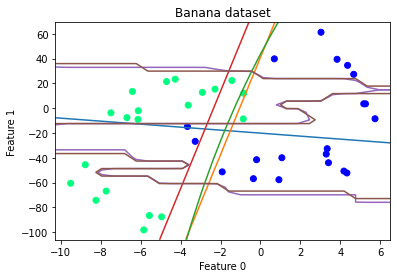

In [53]:
classifiers = ["nmc", "ldc", "qdc", "fisherc" ,"parzenc", "knnc"]
trained_classifiers = [getattr(pr, cls)(dataset, w=1) if cls == 'knnc' else getattr(pr, cls)(dataset)
                       for cls in classifiers]
pr.scatterd(dataset)
[pr.plotc(tc) for tc in trained_classifiers];

The linear, quadratic and fisher classifiers are not affected by the messed up scale. as these methods estimate the value of the $\sum$, specifically they estimate the variance values of the $\sum$ matrix; therefore the scale of the features is autmatically incorporated.

In many cases this behaviour could be advantageous as one doesn't really have to worry about the scale of the feature space. However, for the classifiers to reliably estimate the variance values and therefore the scale, there needs to be enough data available to do such a thing.